In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('mushroom.csv',names=['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color',
'stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number',
'ring-type','spore-print-color','population','habitat'])

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.shape

(8124, 23)

In [6]:
#proveravamo da li neki podaci nedostaju
pd.isnull(df).values.any()

False

In [7]:
#koje klase postoje
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [8]:
#delimo dataFrame na cilj kome tezimo (Y) i atribute(X)
Y = df['class']
X = df[df.columns[1:]]

In [9]:
Y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [10]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [12]:
#posto su nam podaci koje imamo kategoricki, zelimo da ih prevedemo u takozvanu dummy reprezentaciju, odnosno da atributi 
#imaju samo vrednosti 0 ili 1, tacnije da ukazuju da odsustvo ili prisustvo nekog kategoriskog efekta
X_dummy = pd.get_dummies(X)
Y_dummy = Y.apply(lambda x: 1 if x=='e' else 0)

In [13]:
X_dummy

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [47]:
df = df.drop(str(df.columns[11]), axis = 1)

In [48]:
Y_dummy

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int64

In [49]:
#sada imamo mnogo vise atributa
df2 = pd.get_dummies(df)
df2.shape

(8124, 114)

In [50]:





#TREES TRAINING





In [51]:
#prvi korak je da se skup podataka podeli na skupove za obuku, i na skupove za testiranje.
#prvi pristup je da se za obuku uzme n redova, a ostatak za testiranje

from sklearn import tree
def naive_split(X, Y, n):
    X_train = X[:n]
    X_test  = X[n:]
    Y_train = Y[:n]
    Y_test  = Y[n:]
    return (X_train, X_test, Y_train, Y_test)



In [67]:
def train_model(n=7000):
  
    X_train, X_test, Y_train, Y_test = naive_split(X_dummy, Y_dummy, n)
    clf = tree.DecisionTreeClassifier(random_state=42) 
    clf = clf.fit(X_train, Y_train)
    return (X_test, Y_test, clf)
print(f"Tacnost algoritma: Tree:{clf.score(X_test, Y_test)}")

Tacnost algoritma: Tree:1.0


In [53]:
X_test, Y_test, clf = train_model()

In [55]:
#za primer moze da se predvidi klasu prve tacke u test podacima


clf.predict(X_test[0:1]).tolist()[0]



0

In [56]:
Y_test[0:1].tolist()[0]

0

In [57]:
#sada koristimo metricki modul, koji implementira funkcije za predvidjanje gresaka 
import sklearn.metrics as metrics

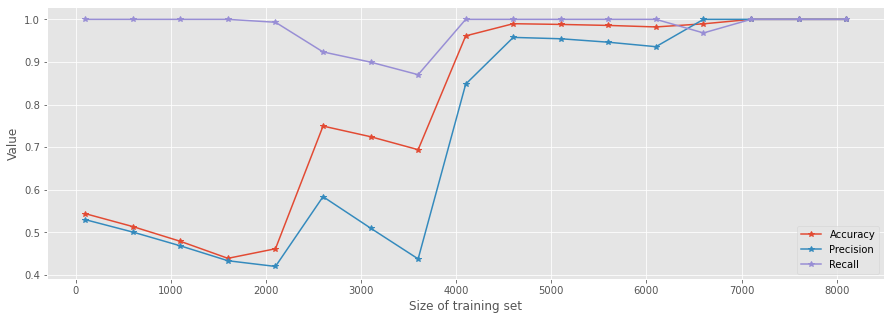

In [58]:
#uzimacemo skupove za obuku rastuce velicine i proceniti tacnost (sto je i rezultat kod stabla odlucivanja), preciznost
#i recall (odnost tp / (tp+fn), gde je tp broj pozitivnih, a fn broj negativnih) 

sizes = np.arange(100,len(Y_dummy), 500) # vraca ravnomerno rasporedjene vrednosti unutar datog intervala
result = {}
for size in sizes:
    X_test, Y_test, clf = train_model(n=size)
    score     = clf.score(X_test, Y_test) # vraca srednju tacnost za date podatke testa
    precision = metrics.precision_score(Y_test, clf.predict(X_test))
    recall    = metrics.recall_score(Y_test, clf.predict(X_test))
    result[size] = (score, precision, recall)

result = pd.DataFrame(result).transpose()
result.columns = ['Accuracy', 'Precision', 'Recall']
result.plot(marker='*', figsize=(15,5))
plt.xlabel('Size of training set')
plt.ylabel('Value');




In [59]:
#moze se primetiti da kada je velicina skupa veca od 5000, model dobro predvidja. To znaci da je potrebno poboljsati model

In [60]:
#sada je potrebno probati sa random generisanim skupom za obuku i testiranje. Koriscenjem metode train_test_split

In [61]:


from sklearn import model_selection
sizes = np.arange(0.9,0.01, -0.02)
result = {}
for size in sizes:
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
        X_dummy, Y_dummy, test_size=size, random_state=42)
    clf = tree.DecisionTreeClassifier(random_state=42)
    clf = clf.fit(X_train, Y_train)
    score     = clf.score(X_test, Y_test)
    precision = metrics.precision_score(Y_test, clf.predict(X_test))
    recall    = metrics.recall_score(Y_test, clf.predict(X_test))
    result[len(Y_train)] = (score, precision, recall)

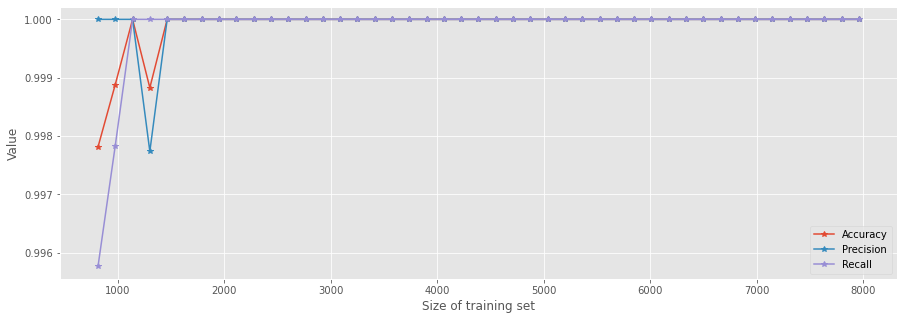

In [62]:
result = pd.DataFrame(result).transpose()
result.columns = ['Accuracy', 'Precision', 'Recall']
result.plot(marker='*', figsize=(15,5))
plt.xlabel('Size of training set')
plt.ylabel('Value');

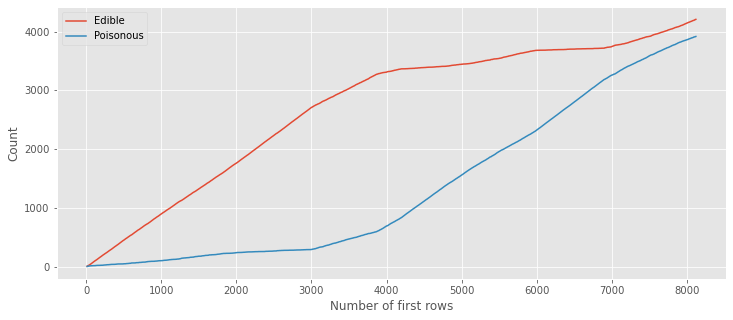

In [63]:
#Ovde se vidi znacajno poboljsanje
#ali to i nije toliko cudno, jer ako pogledamo dataset, u prvih n redova se i vidi da je veci broj jestivih pecuraka
e = []
p = []
for i in range(10,len(Y)):
    tmp = Y[:i].value_counts()
    e.append(tmp['e'])
    p.append(tmp['p'])
type_count = pd.DataFrame({'Edible': e, 'Poisonous': p},index=range(10,len(Y_dummy)))
type_count.plot(figsize=(12,5))
plt.xlabel('Number of first rows');
plt.ylabel('Count');

In [64]:
#na slici vidimo da je do 6000 primeraka mnogo veci broj jestivih pecuraka